## Import necessary libraries

In [1]:
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt 
import seaborn as sns          

In [2]:
df = pd.read_csv('../data/cardio_train.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
m = df[df['gender']==1]

m

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [114]:
print(f"Shape of dataset: {df.shape}")
print("-" * 30)
df.info()

Shape of dataset: (70000, 13)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [115]:
print("Missing values per column:")
print(df.isnull().sum()) 

print("-" * 30)

df = df.drop(columns=['id'])
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed!")

Missing values per column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
------------------------------
Number of duplicate rows: 24
Duplicates removed!


In [116]:
df['age_years'] = (df['age'] / 365).round().astype(int)

df.drop(columns=['age'], inplace=True)

df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,48


In [117]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed!")

Number of duplicate rows: 3792
Duplicates removed!


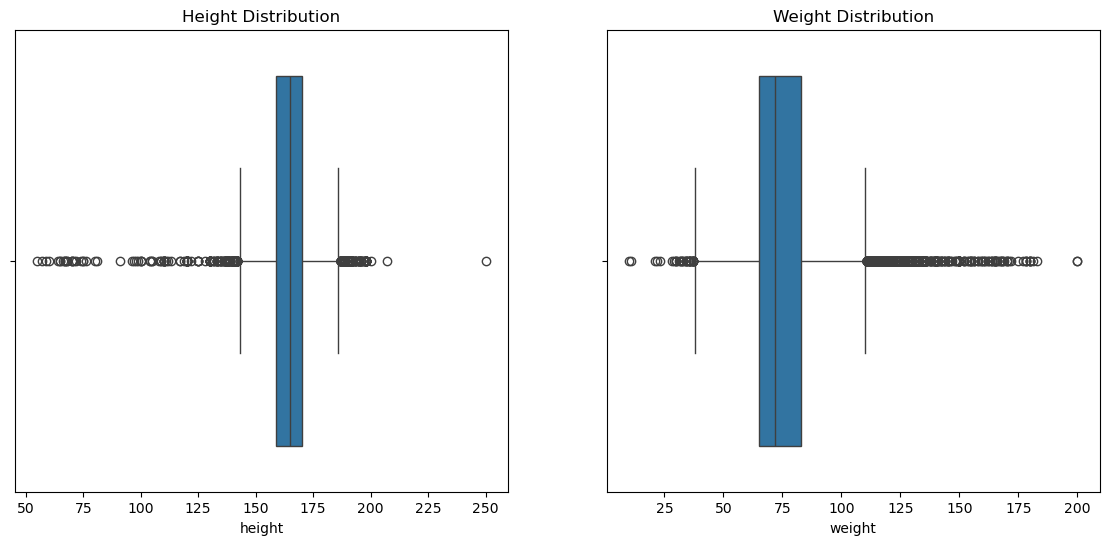

In [118]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['height'])
plt.title('Height Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['weight'])
plt.title('Weight Distribution')
plt.show()

## (Removing the "Impossible" Data)
### Note: We are using standard medical logic here. Blood pressure (ap_hi, ap_lo) cannot be negative or absurdly high (e.g., > 250).

In [120]:
df = df[(df['height'] >= 100) & (df['height'] <= 250)]

# Keep weights above 30kg
df = df[df['weight'] >= 30]

# Filter Blood Pressure: Systolic (ap_hi) must be > Diastolic (ap_lo)
# Also removing impossible extreme values (e.g., negative BP)
df = df[(df['ap_hi'] < 250) & (df['ap_hi'] > 40)]
df = df[(df['ap_lo'] < 200) & (df['ap_lo'] > 40)]

print(f"Dataset shape after cleaning: {df.shape}")

Dataset shape after cleaning: (64912, 12)


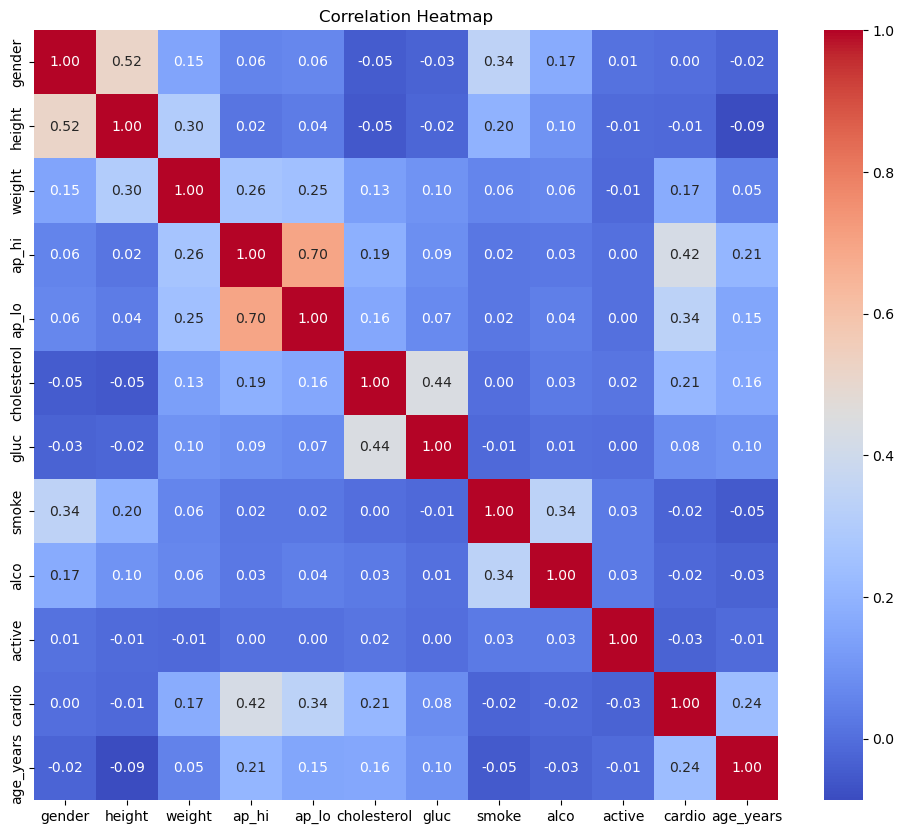

In [121]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

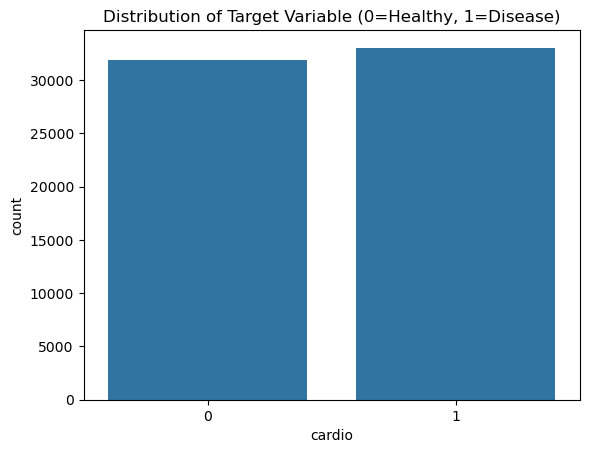

In [122]:
sns.countplot(x='cardio', data=df, )
plt.title('Distribution of Target Variable (0=Healthy, 1=Disease)')
plt.show()

In [123]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

print("BMI feature created!")
print(df[['bmi', 'cardio']].corr())

BMI feature created!
             bmi    cardio
bmi     1.000000  0.178214
cardio  0.178214  1.000000


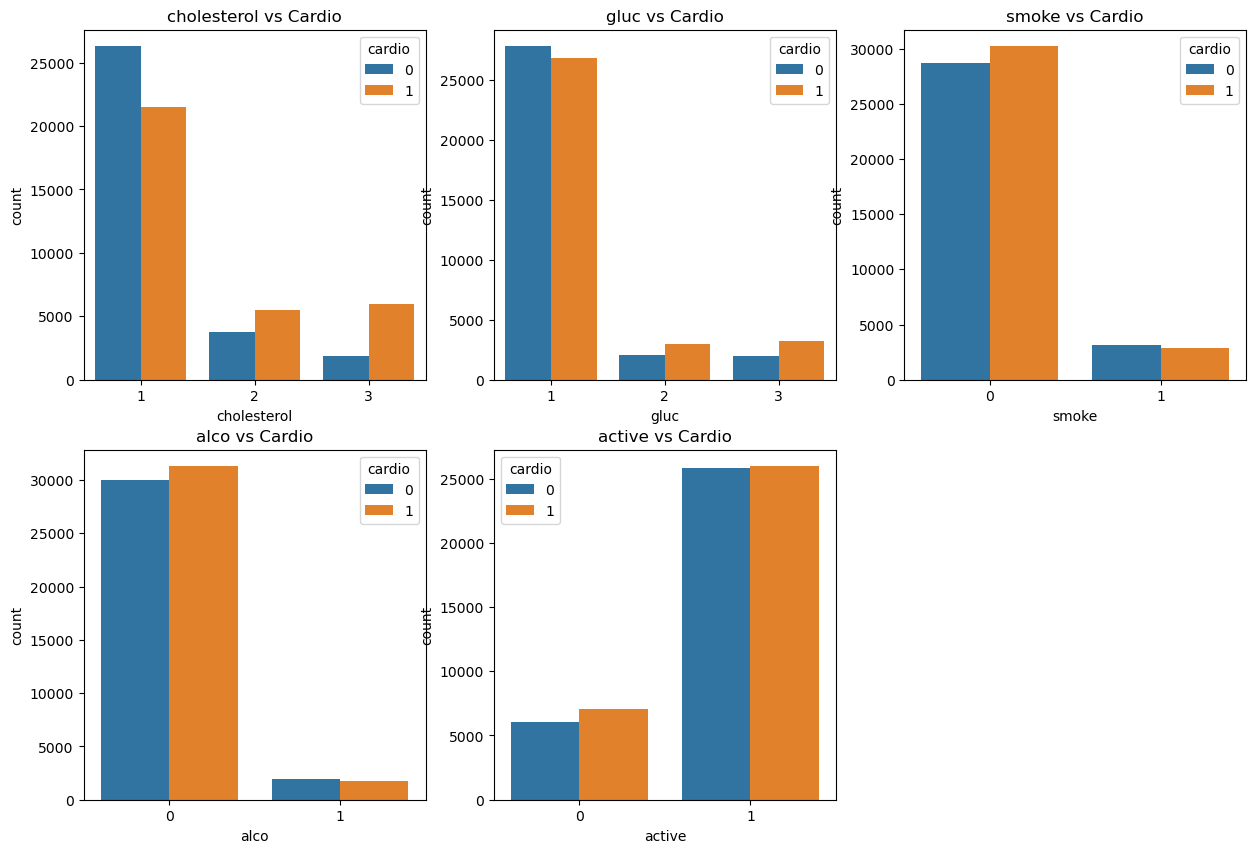

In [124]:
features = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    
    sns.countplot(x=col, hue='cardio', data=df)
    plt.title(f'{col} vs Cardio')

plt.show()

### The graph confirms this. People with heart disease (1) tend to have higher pulse pressure than healthy people.

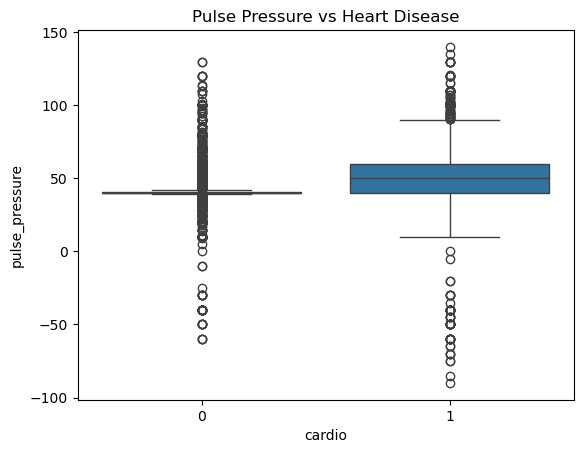

In [126]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

sns.boxplot(x='cardio', y='pulse_pressure', data=df)
plt.title("Pulse Pressure vs Heart Disease")
plt.show()

In [127]:
cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'pulse_pressure']
for col in cols:
    print(f"'{col}': {{'min': {df[col].min()}, 'max': {df[col].max()}}},")

'age_years': {'min': 30, 'max': 65},
'height': {'min': 100, 'max': 250},
'weight': {'min': 30.0, 'max': 200.0},
'ap_hi': {'min': 70, 'max': 240},
'ap_lo': {'min': 45, 'max': 190},
'bmi': {'min': 10.726643598615919, 'max': 152.55177514792896},
'pulse_pressure': {'min': -90, 'max': 140},


In [128]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi', 'pulse_pressure']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
for col in cols_to_scale:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Save the updated dataset
df.to_csv('../data/cardio_train_clean.csv', index=False)
print("Enhanced dataset saved with BMI and Pulse Pressure!")

Enhanced dataset saved with BMI and Pulse Pressure!


In [129]:
df.shape

(64912, 14)